<a href="https://colab.research.google.com/github/Mathias2512/Spotify/blob/main/Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Loading & Exploration


In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount ('/content/drive')
path = '/content/drive/MyDrive/Machine Learning/spotify.csv'
df = pd.read_csv(path)
df.head(3)

Mounted at /content/drive


,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1


In [2]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB


(8000, 12)

In [3]:
df.describe()

,user_id,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4000.50000,37.662125,154.068250,50.127250,0.300127,6.943875,0.747750,0.258875
std,2309.54541,12.740359,84.015596,28.449762,0.173594,13.617953,0.434331,0.438044
min,1.00000,16.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.75000,26.000000,81.000000,25.000000,0.150000,0.000000,0.000000,0.000000
50%,4000.50000,38.000000,154.000000,50.000000,0.300000,0.000000,1.000000,0.000000
75%,6000.25000,49.000000,227.000000,75.000000,0.450000,5.000000,1.000000,1.000000
max,8000.00000,59.000000,299.000000,99.000000,0.600000,49.000000,1.000000,1.000000


#Data Cleaning & Pre-procesing


In [4]:
df.isnull().sum()

,0
user_id,0
gender,0
age,0
country,0
subscription_type,0
listening_time,0
songs_played_per_day,0
skip_rate,0
device_type,0
ads_listened_per_week,0


In [5]:
df['gender']= df['gender'].astype('string')
df['subscription_type']= df['subscription_type'].astype('string')
df['device_type']= df['device_type'].astype('string')
df['country']= df['country'].astype('string')
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   string 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   string 
 4   subscription_type      8000 non-null   string 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   string 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), string(4)
memory usage: 750.1 KB


#Exploratory Data Analysis

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [7]:
numeric_col= ['age', 'listening_time', 'songs_played_per_day', 'skip_rate', 'ads_listened_per_week', 'offline_listening', 'is_churned']
numeric_df= df[numeric_col]        #Lista numerica de columna excluyendo el USER ID
numeric_df

,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned
0,54,26,23,0.20,31,0,1
1,33,141,62,0.34,0,1,0
2,38,199,38,0.04,0,1,1
3,22,36,2,0.31,0,1,0
4,29,250,57,0.36,0,1,1
...,...,...,...,...,...,...,...
7995,44,237,36,0.30,0,1,1
7996,34,61,64,0.59,0,1,0
7997,17,81,62,0.33,5,0,0
7998,34,245,94,0.27,0,1,0


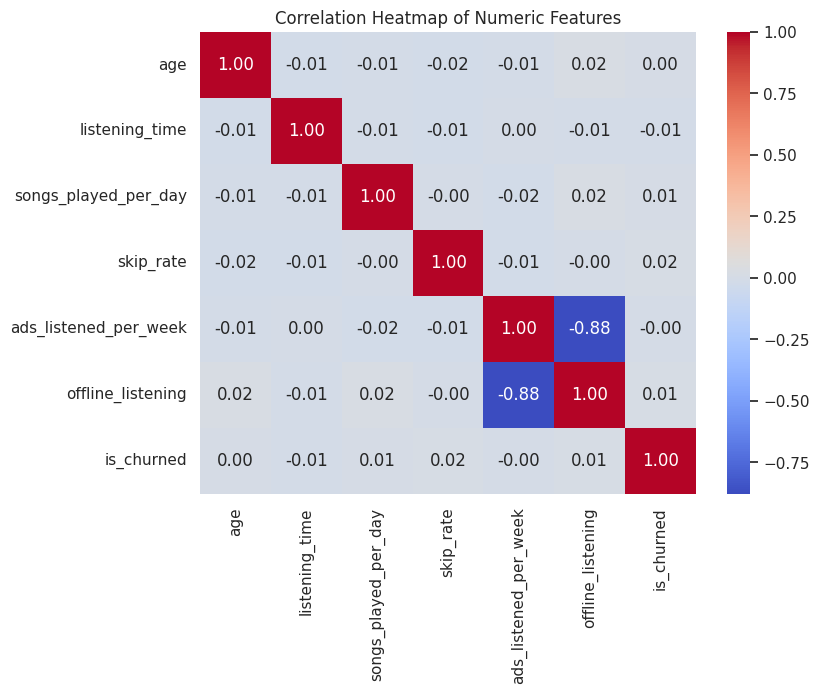

In [8]:
#Check numbers of numeric columns
#Grafica de calor
if len(numeric_df.columns) >= 2:
    plt.figure(figsize=(8, 6))
    corr_matrix = numeric_df.corr()
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.savefig('correlation_heatmap.png')
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')


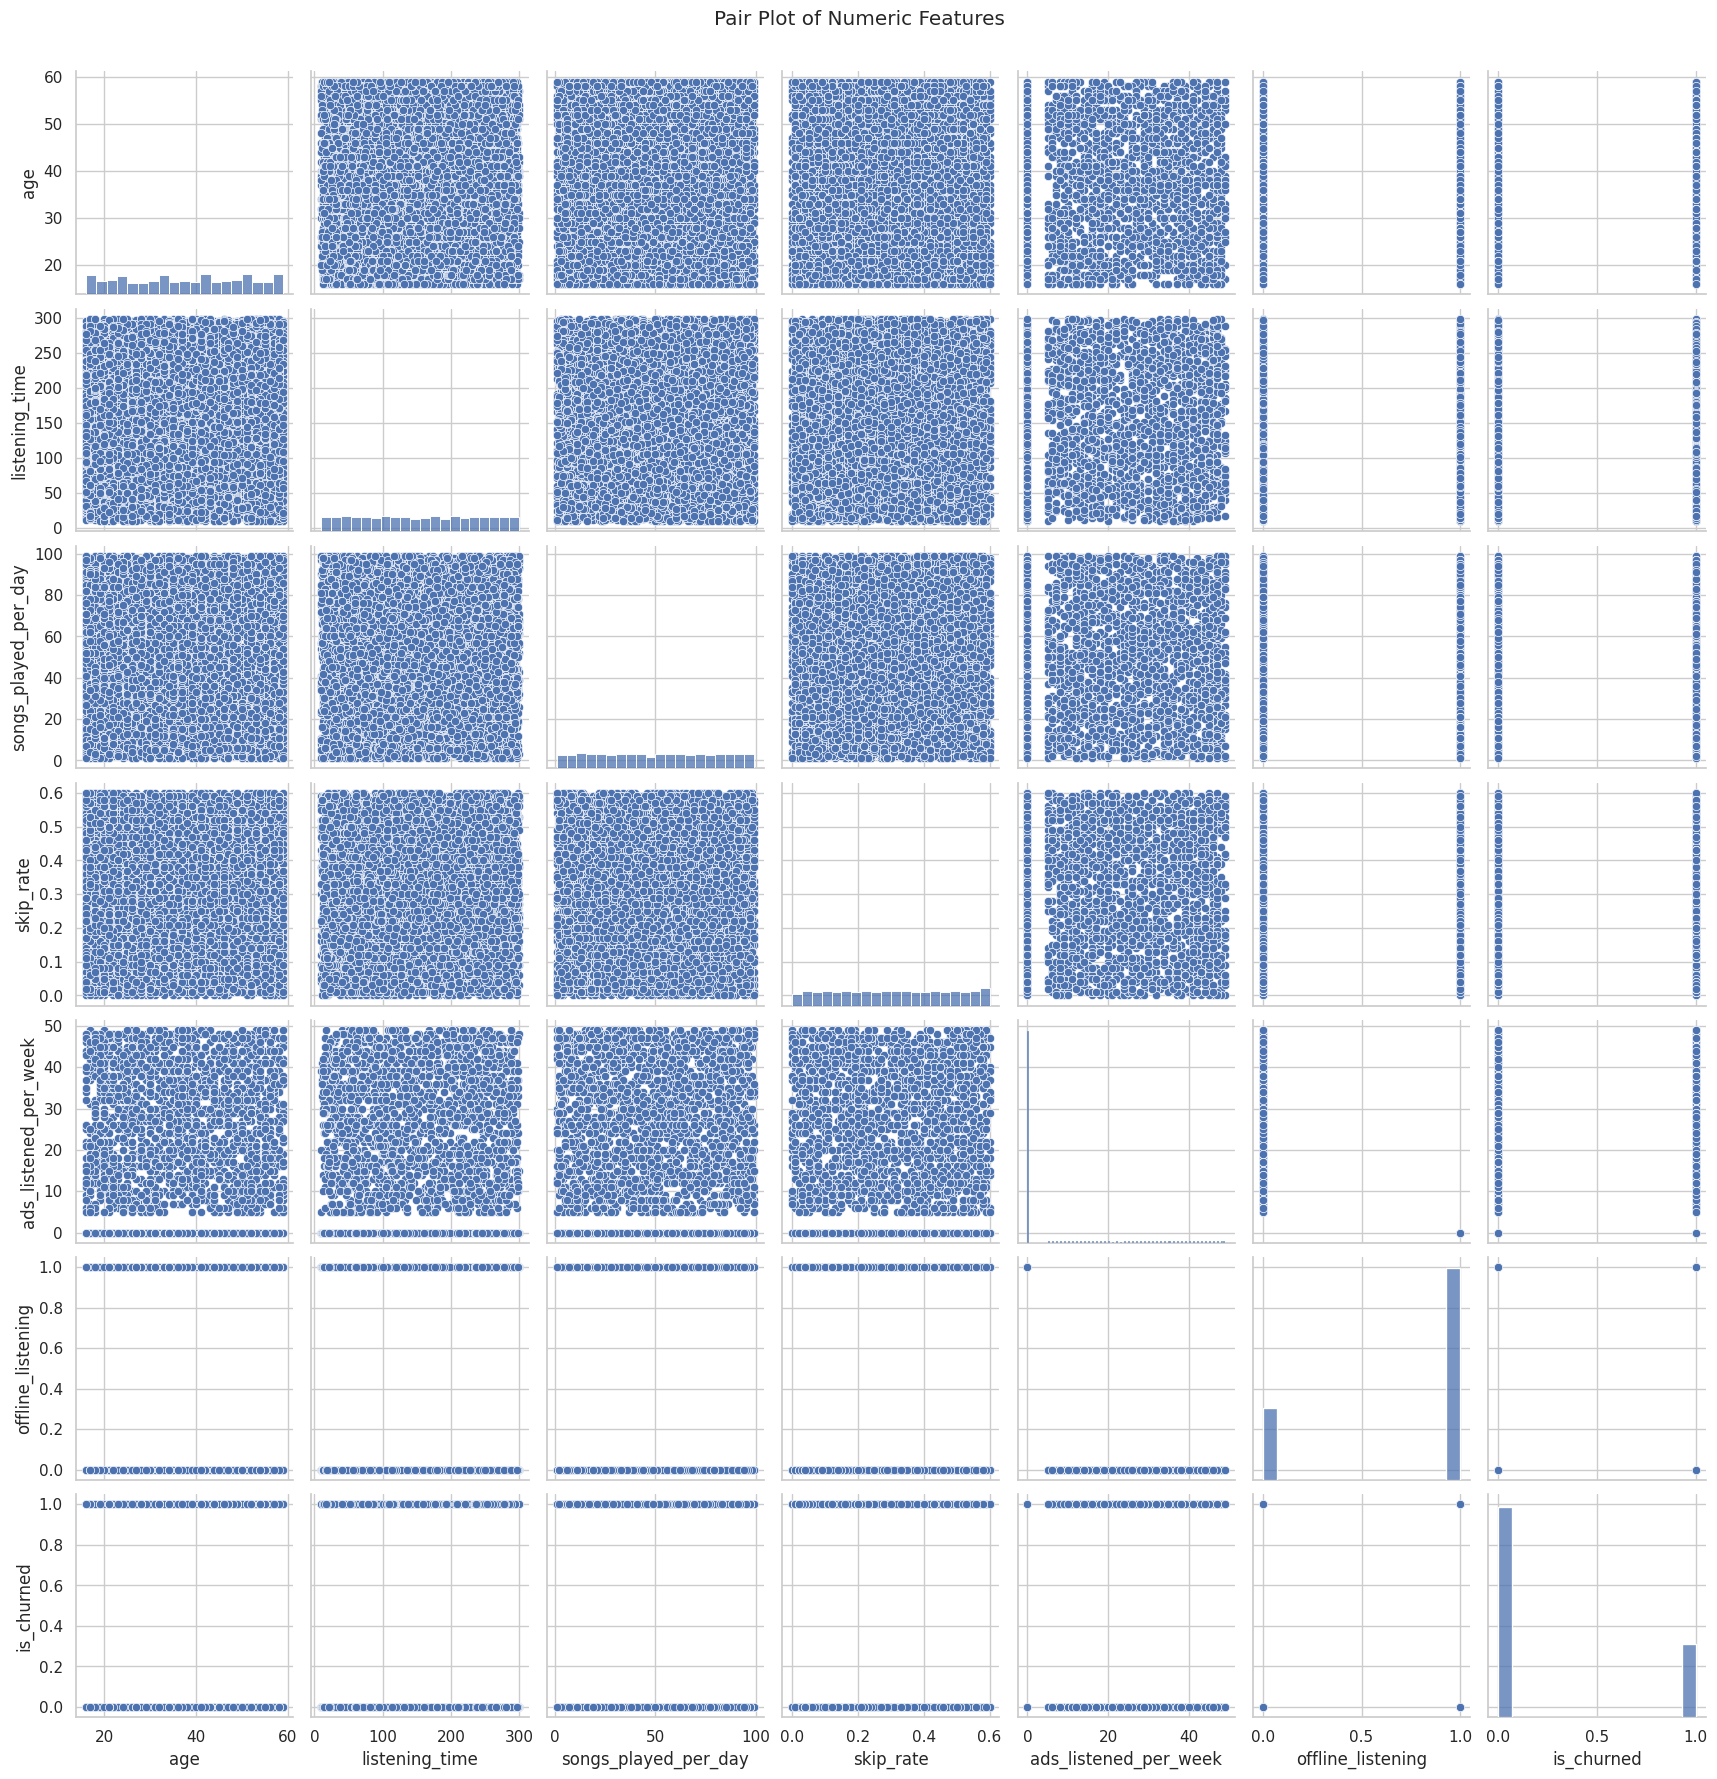

In [9]:
# Pair Plot of numeric features
sns.pairplot(numeric_df)
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.savefig('pairplot_numeric.png')
plt.show()

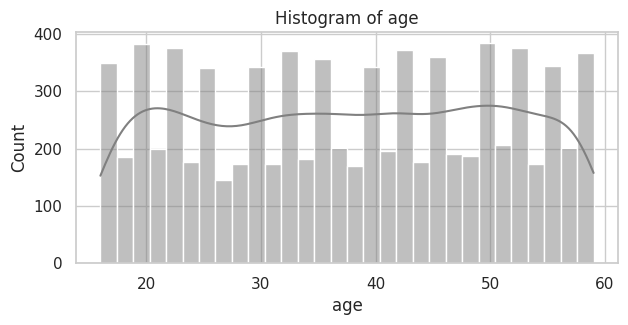

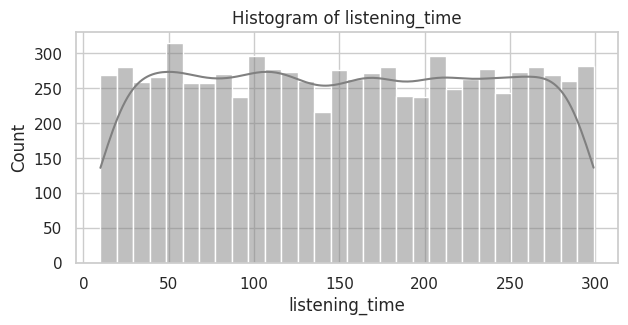

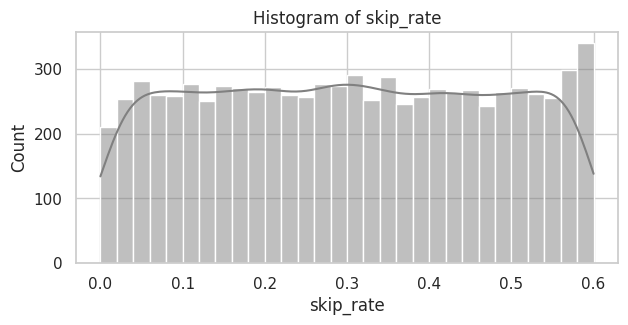

In [27]:
# Histograms for selected numeric features
features_to_hist = ['age', 'listening_time', 'skip_rate']
for feature in features_to_hist:
    plt.figure(figsize=(7, 3))
    sns.histplot(df[feature], kde=True, bins=30, color= 'gray')
    plt.title(f'Histogram of {feature}')
    plt.savefig(f'hist_{feature}.png')
    plt.show()

/tmp/ipython-input-2620470357.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x =col, order=df[col].value_counts().index, palette='pastel')


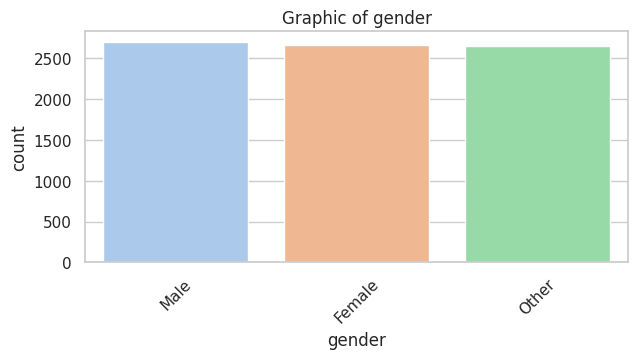

/tmp/ipython-input-2620470357.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x =col, order=df[col].value_counts().index, palette='pastel')


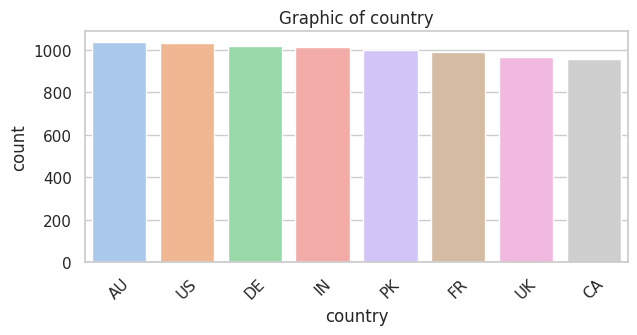

/tmp/ipython-input-2620470357.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x =col, order=df[col].value_counts().index, palette='pastel')


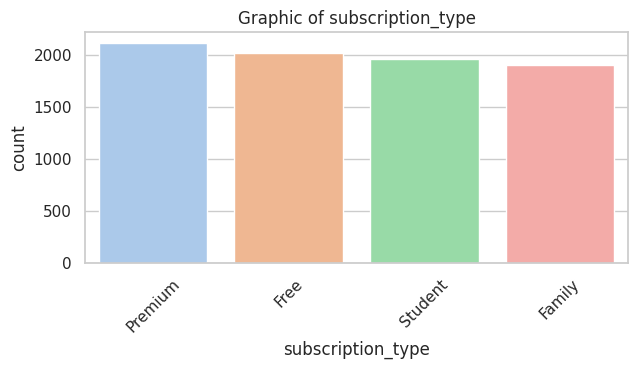

/tmp/ipython-input-2620470357.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x =col, order=df[col].value_counts().index, palette='pastel')


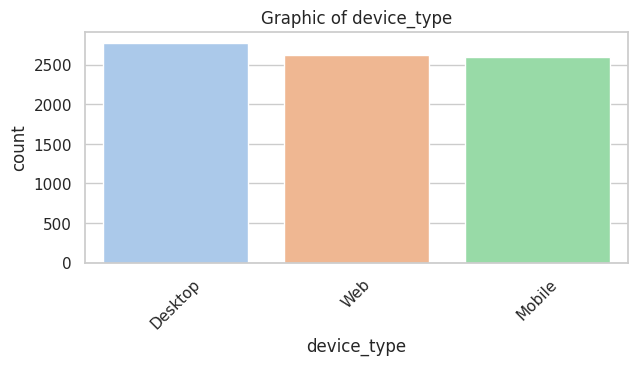

In [24]:
# Count plots for categorical variables
categorical_cols = ['gender', 'country', 'subscription_type', 'device_type']
for col in categorical_cols:
    plt.figure(figsize=(7, 3))
    sns.countplot(data=df, x =col, order=df[col].value_counts().index, palette='pastel')
    plt.title(f'Graphic of {col}')
    plt.xticks(rotation=45)
    plt.savefig(f'countplot_{col}.png')
    plt.show()

/tmp/ipython-input-695539900.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='subscription_type', y='listening_time', errorbar=None, order=df['subscription_type'].value_counts().index, palette= 'pastel')


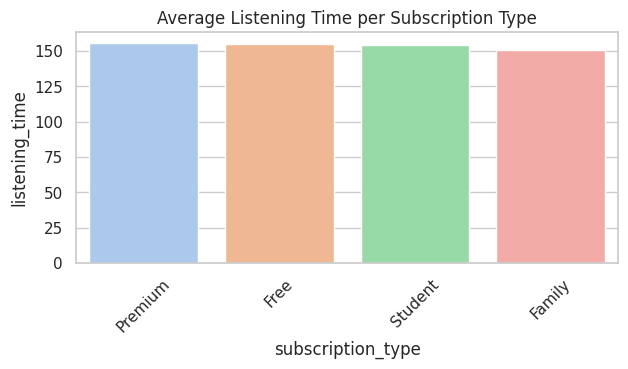

In [21]:
# Grouped barplot: Average listening time per subscription type
plt.figure(figsize=(7, 3))
sns.barplot(data=df, x='subscription_type', y='listening_time', errorbar=None, order=df['subscription_type'].value_counts().index, palette= 'pastel')
plt.title('Average Listening Time per Subscription Type')
plt.xticks(rotation=45)
plt.savefig('grouped_bar_subscription.png')
plt.show()

/tmp/ipython-input-2875722581.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_churned', y='songs_played_per_day', data=df, palette= 'pastel')


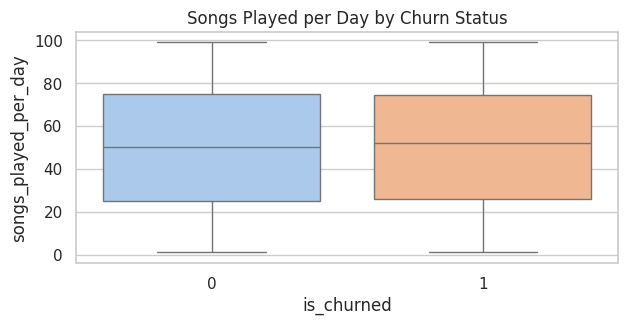

In [22]:
# Box plot for songs played per day by churn status
plt.figure(figsize=(7, 3))
sns.boxplot(x='is_churned', y='songs_played_per_day', data=df, palette= 'pastel')
plt.title('Songs Played per Day by Churn Status')
plt.savefig('boxplot_songs_churn.png')
plt.show()

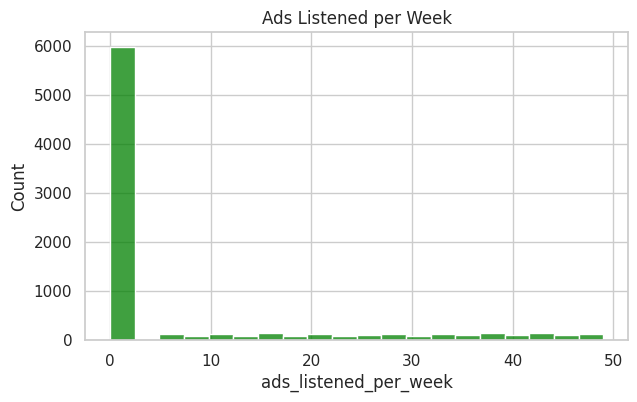

In [28]:
plt.figure(figsize=(7,4))
sns.histplot(df['ads_listened_per_week'], bins=20, kde=False, color="green")
plt.title("Ads Listened per Week")
plt.show()

/tmp/ipython-input-1208518589.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="offline_listening", data=df, palette="Set2")


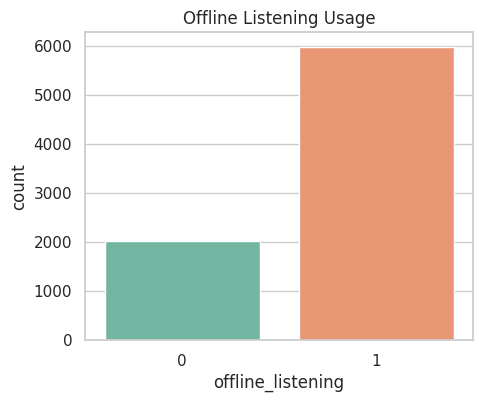

In [32]:
#Offline Listeners
plt.figure(figsize=(5,4))
sns.countplot(x="offline_listening", data=df, palette="Set2")
plt.title("Offline Listening Usage")
plt.show()

#Exploratory data analysis for Churn

/tmp/ipython-input-2628428655.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="is_churned", data=df, palette="Set2")


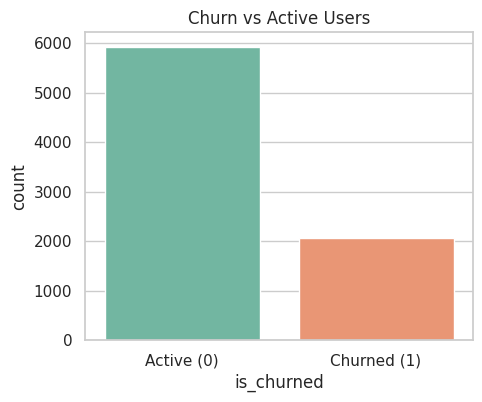

In [33]:
plt.figure(figsize=(5,4))
sns.countplot(x="is_churned", data=df, palette="Set2")
plt.title("Churn vs Active Users")
plt.xticks([0,1], ["Active (0)", "Churned (1)"])
plt.show()

/tmp/ipython-input-1953269759.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="is_churned", y="age", data=df, palette="Set3")


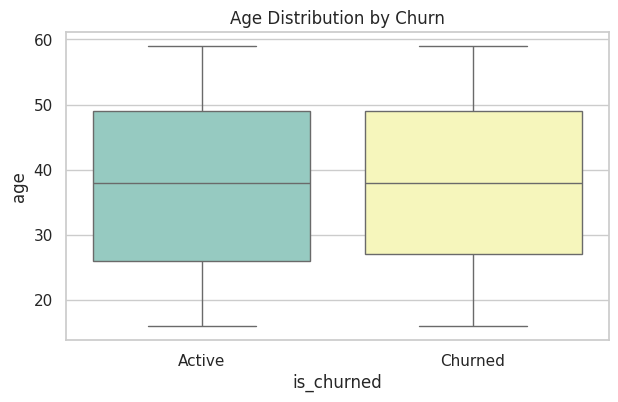

In [34]:
# Age vs Churn

plt.figure(figsize=(7,4))
sns.boxplot(x="is_churned", y="age", data=df, palette="Set3")
plt.title("Age Distribution by Churn")
plt.xticks([0,1], ["Active", "Churned"])
plt.show()

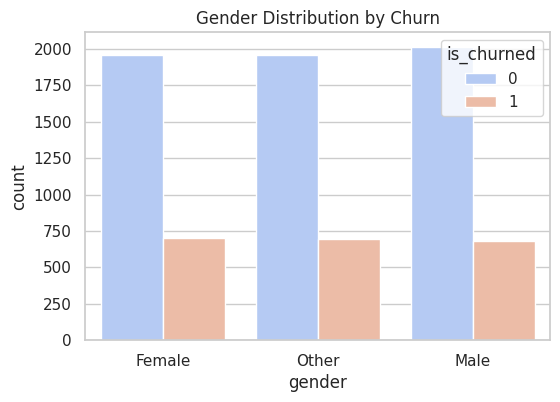

In [35]:
# Gender vs Churn

plt.figure(figsize=(6,4))
sns.countplot(x="gender", hue="is_churned", data=df, palette="coolwarm")
plt.title("Gender Distribution by Churn")
plt.show()

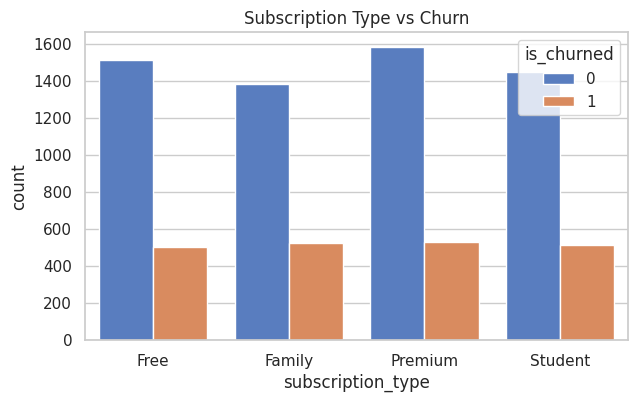

In [36]:
# Subscription Type vs Churn

plt.figure(figsize=(7,4))
sns.countplot(x="subscription_type", hue="is_churned", data=df, palette="muted")
plt.title("Subscription Type vs Churn")
plt.show()

/tmp/ipython-input-2614101448.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="is_churned", y="listening_time", data=df, palette="Set2")


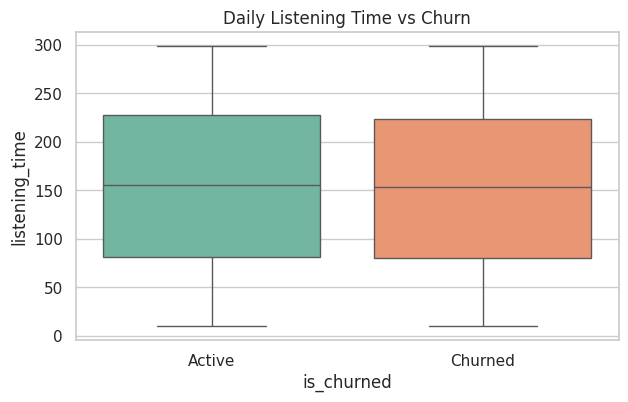

In [37]:
# Listening Time vs Churn

plt.figure(figsize=(7,4))
sns.boxplot(x="is_churned", y="listening_time", data=df, palette="Set2")
plt.title("Daily Listening Time vs Churn")
plt.xticks([0,1], ["Active", "Churned"])
plt.show()

/tmp/ipython-input-3684258136.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="is_churned", y="songs_played_per_day", data=df, palette="Set1")


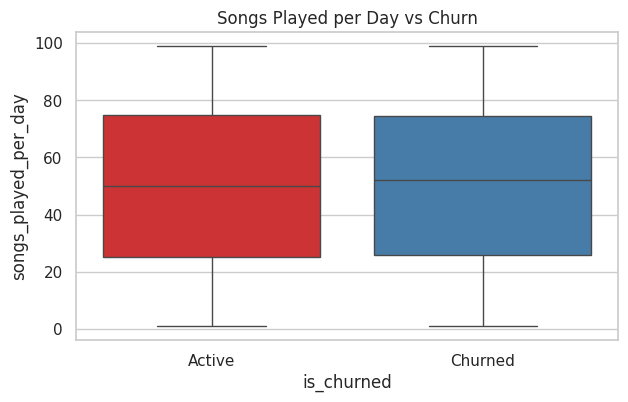

In [38]:
# Songs Played per Day vs Churn

plt.figure(figsize=(7,4))
sns.boxplot(x="is_churned", y="songs_played_per_day", data=df, palette="Set1")
plt.title("Songs Played per Day vs Churn")
plt.xticks([0,1], ["Active", "Churned"])
plt.show()

/tmp/ipython-input-1114729571.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="is_churned", y="skip_rate", data=df, palette="coolwarm")


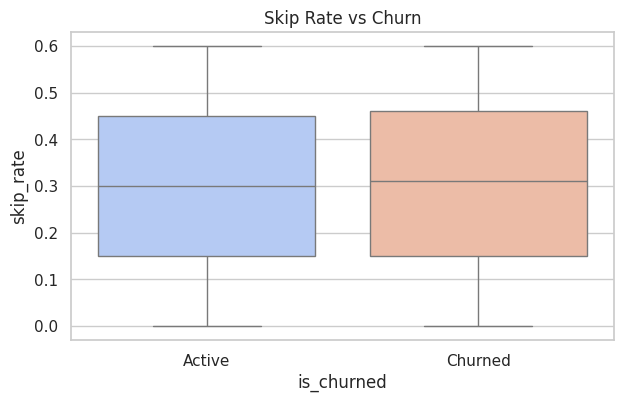

In [39]:
# Skip Rate vs Churn

plt.figure(figsize=(7,4))
sns.boxplot(x="is_churned", y="skip_rate", data=df, palette="coolwarm")
plt.title("Skip Rate vs Churn")
plt.xticks([0,1], ["Active", "Churned"])
plt.show()

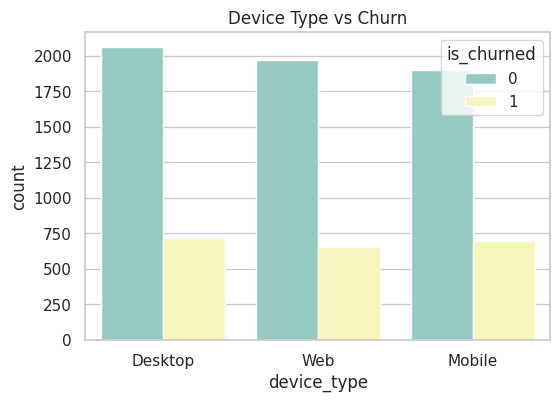

In [40]:
# Device Type vs Churn

plt.figure(figsize=(6,4))
sns.countplot(x="device_type", hue="is_churned", data=df, palette="Set3")
plt.title("Device Type vs Churn")
plt.show()

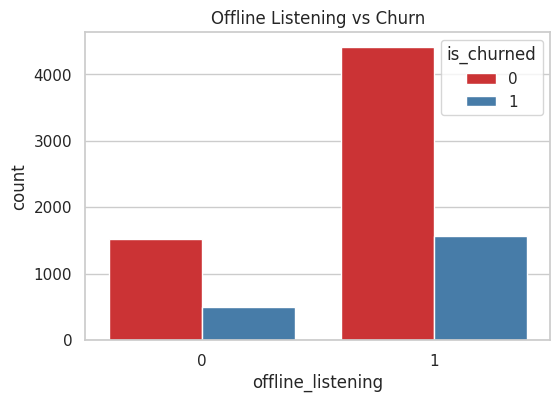

In [41]:
# Offline Listening vs Churn

plt.figure(figsize=(6,4))
sns.countplot(x="offline_listening", hue="is_churned", data=df, palette="Set1")
plt.title("Offline Listening vs Churn")
plt.show()

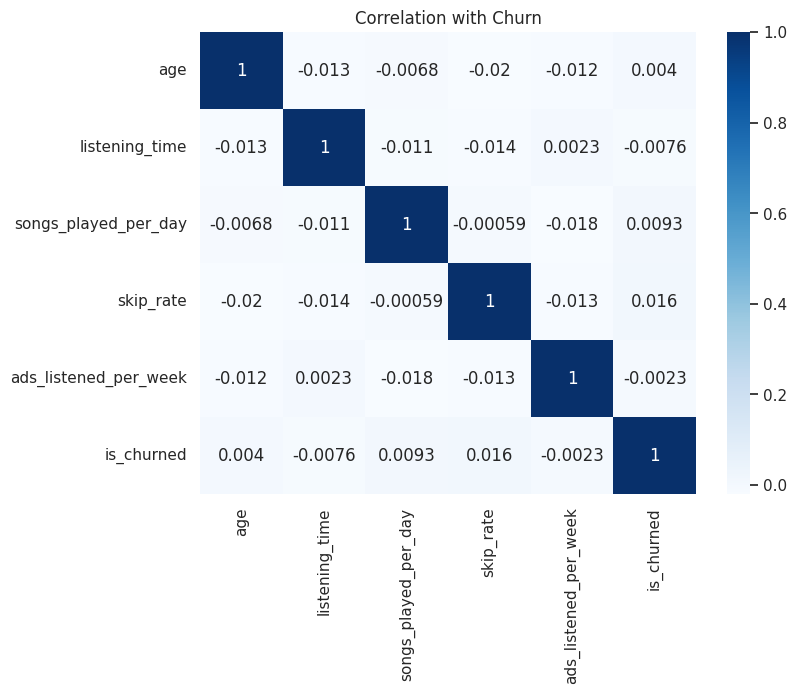

In [42]:
# Correlation with Churn (Numeric only)

plt.figure(figsize=(8,6))
sns.heatmap(df[['age','listening_time','songs_played_per_day','skip_rate','ads_listened_per_week','is_churned']].corr(),
            annot=True, cmap="Blues")
plt.title("Correlation with Churn")
plt.show()

#Predictive Analysis (ML) for Churn

In [43]:
# Scikit-learn libraries for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [45]:
cat_cols = ['gender', 'country', 'subscription_type', 'device_type']

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [46]:
# Train-Test Split
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = df.drop('is_churned', axis=1)   # sirf Churn drop karna hai
y = df['is_churned']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [50]:
from sklearn.metrics import classification_report
lr = LogisticRegression(max_iter=1000, random_state=42, class_weight="balanced")
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("\n Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr), '\n')
print('\n', classification_report(y_test, y_pred_lr), '\n')
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr), '\n')


 Logistic Regression Accuracy: 0.53 


               precision    recall  f1-score   support

           0       0.75      0.54      0.63      1186
           1       0.27      0.50      0.35       414

    accuracy                           0.53      1600
   macro avg       0.51      0.52      0.49      1600
weighted avg       0.63      0.53      0.56      1600
 


 Confusion Matrix:
 [[643 543]
 [209 205]] 



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier(random_state=42, class_weight="balanced")

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt), '\n')
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.62625 

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1186
           1       0.28      0.28      0.28       414

    accuracy                           0.63      1600
   macro avg       0.51      0.51      0.51      1600
weighted avg       0.63      0.63      0.63      1600



In [55]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, class_weight="balanced")

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf), '\n')
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.738125 

              precision    recall  f1-score   support

           0       0.74      0.99      0.85      1186
           1       0.14      0.00      0.00       414

    accuracy                           0.74      1600
   macro avg       0.44      0.50      0.43      1600
weighted avg       0.59      0.74      0.63      1600



In [57]:
# SVM
from sklearn.svm import SVC

svm = SVC(random_state=42, class_weight="balanced", probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm), '\n')
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.47375 

              precision    recall  f1-score   support

           0       0.72      0.47      0.57      1186
           1       0.24      0.48      0.32       414

    accuracy                           0.47      1600
   macro avg       0.48      0.48      0.45      1600
weighted avg       0.60      0.47      0.51      1600



Model Comparison:
Logistic Regression: 0.5300
Decision Tree: 0.6262
Random Forest: 0.7381
SVM: 0.4738


/tmp/ipython-input-1045429273.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Modelo", y="Accuracy", data=results_df, palette="viridis")


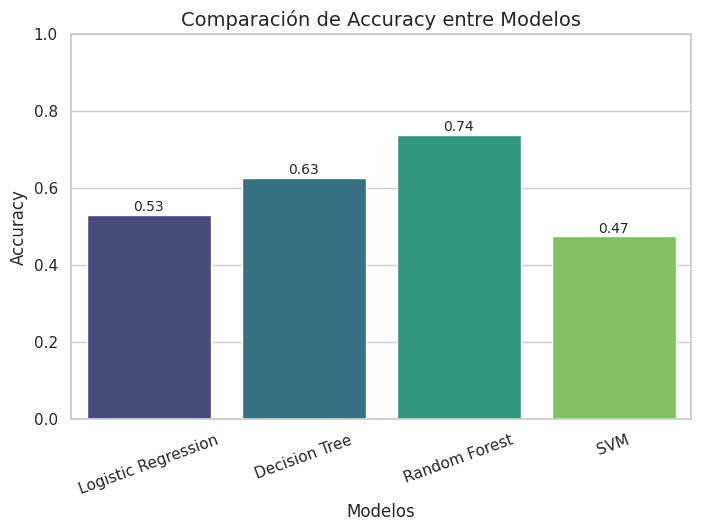

In [59]:
results = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "SVM": accuracy_score(y_test, y_pred_svm)
}

print("Model Comparison:")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")

# Convertir a DataFrame para Seaborn
results_df = pd.DataFrame(list(results.items()), columns=["Modelo", "Accuracy"])

# Gráfico de barras
plt.figure(figsize=(8,5))
sns.barplot(x="Modelo", y="Accuracy", data=results_df, palette="viridis")

# Personalizar
plt.title("Comparación de Accuracy entre Modelos", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Modelos", fontsize=12)
plt.ylim(0,1)  # porque accuracy siempre está entre 0 y 1
plt.xticks(rotation=20)

# Mostrar valores encima de cada barra
for i, v in enumerate(results_df["Accuracy"]):
    plt.text(i, v + 0.01, f"{v:.2f}", ha="center", fontsize=10)

plt.show()

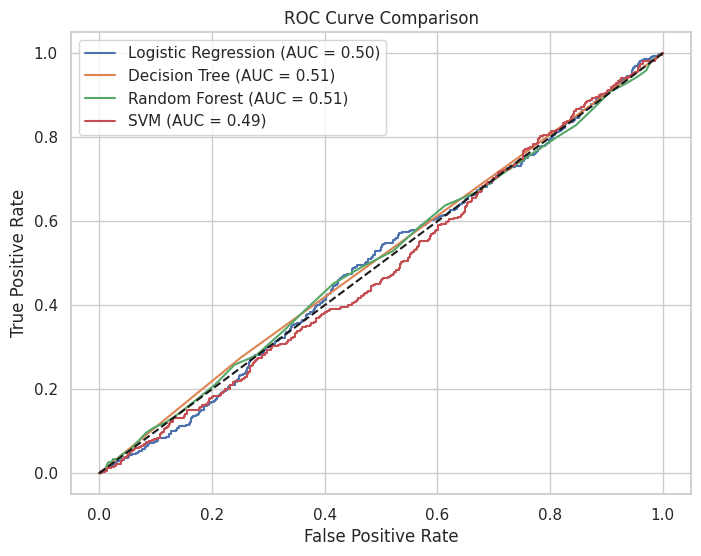

In [60]:
# ROC Comparison

from sklearn.metrics import roc_curve, roc_auc_score

# Models already trained: lr, dt, rf, svm
models = {
    "Logistic Regression": lr,
    "Decision Tree": dt,
    "Random Forest": rf,
    "SVM": svm
}

plt.figure(figsize=(8,6))

for name, model in models.items():
    # Predicted probabilities (for positive class = 1)
    y_prob = model.predict_proba(X_test)[:,1]

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    # Plot
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# Random guessing line
plt.plot([0,1], [0,1], 'k--')

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Dictionary of models
models = {
    "Logistic Regression": lr,
    "Decision Tree": dt,
    "Random Forest": rf,
    "SVM": svm
}

# Empty list to store results
results = []

# Loop over models
for name, model in models.items():
    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    results.append([name, acc, prec, rec, f1, auc])

# Create DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "AUC"])

print(results_df)

                 Model  Accuracy  Precision    Recall  F1-Score       AUC
0  Logistic Regression  0.530000   0.274064  0.495169  0.352840  0.500466
1        Decision Tree  0.626250   0.276699  0.275362  0.276029  0.512049
2        Random Forest  0.738125   0.142857  0.002415  0.004751  0.506729
3                  SVM  0.473750   0.241546  0.483092  0.322061  0.487705


==== Cross Validation Results ====


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression: Mean Accuracy = 0.4982, Scores = [0.33375  0.435625 0.503125 0.5575   0.66125 ]
Decision Tree: Mean Accuracy = 0.5517, Scores = [0.3225   0.610625 0.614375 0.47     0.74125 ]
Random Forest: Mean Accuracy = 0.6579, Scores = [0.331875 0.739375 0.740625 0.73625  0.74125 ]
SVM: Mean Accuracy = 0.4519, Scores = [0.259375 0.25875  0.25875  0.74125  0.74125 ]

==== Confusion Matrices on Test Set ====


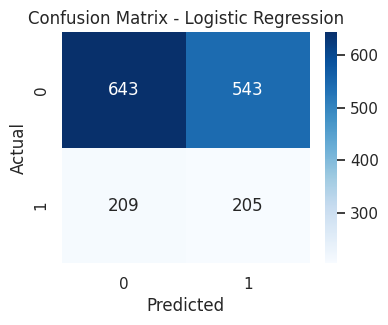

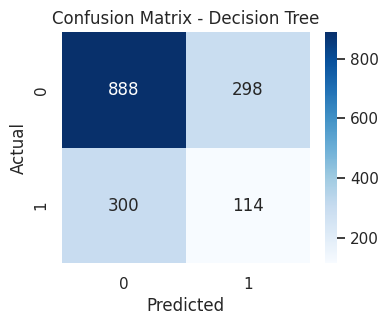

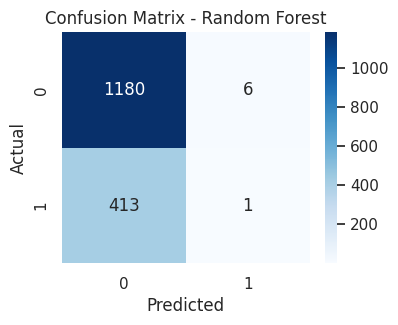

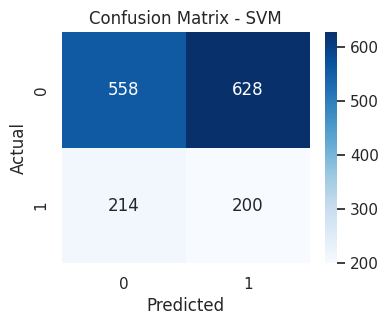

In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dictionary of models (already trained before)
models = {
    "Logistic Regression": lr,
    "Decision Tree": dt,
    "Random Forest": rf,
    "SVM": svm
}

# --- 1. Cross Validation (5-fold) ---
print("==== Cross Validation Results ====")
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name}: Mean Accuracy = {cv_scores.mean():.4f}, Scores = {cv_scores}")

# --- 2. Confusion Matrices ---
print("\n==== Confusion Matrices on Test Set ====")
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()